In [1]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt

plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

Text(0.5, 1.0, 'Circular networks of Shell layout')

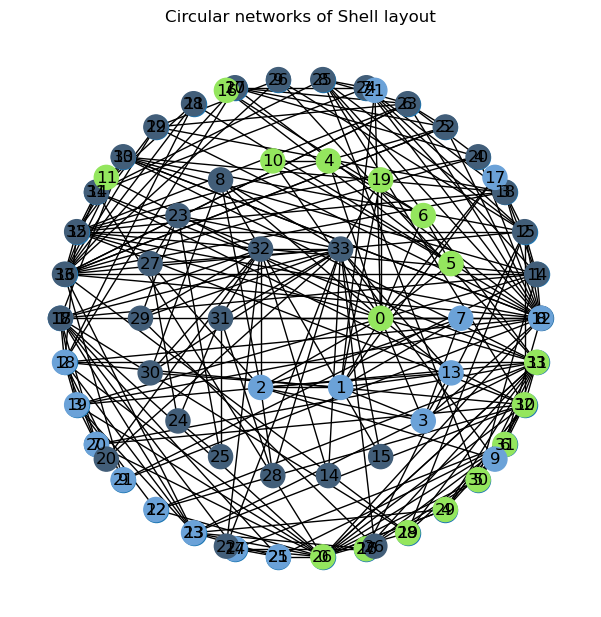

In [5]:
# Create the simple circular networks
G_karate = nx.karate_club_graph()

nx.draw_networkx(G_karate, pos=nx.circular_layout(G_karate))


# Create the Circular layout ordered by community
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)


def community_net(G_in):
    G_out = nx.Graph()
    node_color = []
    node_community = {}
    communities = nxcom.greedy_modularity_communities(G_in)
    for i, com in enumerate(communities):
        for v in com:
            G_out.add_node(v)
            node_color.append(get_color(i))
            node_community[v] = i
    G_out.add_edges_from(G_in.edges())
    return node_color, node_community, G_out


node_color, node_community, G = community_net(G_karate)

nx.draw_networkx(G, pos=nx.circular_layout(G), node_color=node_color)

# Shell Layout—it's just a lot of circles
degrees = dict(G.degree())
labels = sorted(degrees.keys(), key=lambda x: degrees[x], reverse=True)
nlist = []
i, k = 0, 6
while i < len(labels):
    shell_labels = labels[i:i + k]
    ordered_labels = sorted(shell_labels, key=lambda x: node_community[x])
    nlist.append(ordered_labels)
    i += k
    k += 12
pos = nx.shell_layout(G, nlist=nlist)
cm = plt.get_cmap('cool')
nx.draw_networkx(
    G, pos, alpha=1, node_color=node_color, with_labels=True)

plt.title('Circular networks of Shell layout')